In [73]:
import numpy as np
import pandas as pd

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib import rcParams

In [74]:
df = pd.read_csv('data/train.csv')
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [97]:
df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [76]:
print(df.id.unique())
print(df.breath_id.unique())
print(df.R.unique())
print(df.C.unique())
#print(df.time_step.unique())
#print(df.u_in.unique())
#print(df.u_out.unique())
print(df.pressure.nunique())

[      1       2       3 ... 6035998 6035999 6036000]
[     1      2      3 ... 125743 125745 125749]
[20 50  5]
[50 20 10]
950


In [77]:
press = df.pressure.sort_values()#nunique()
press#tail(80)

28729      -1.895744
2698557    -1.895744
5349582    -1.895744
5349561    -1.825442
5781548    -1.825442
             ...    
967373     64.820992
967374     64.820992
967375     64.820992
5731615    64.820992
1383369    64.820992
Name: pressure, Length: 6036000, dtype: float64

/Users/haritha_retnakaran/Documents/Neufische/CapStone/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


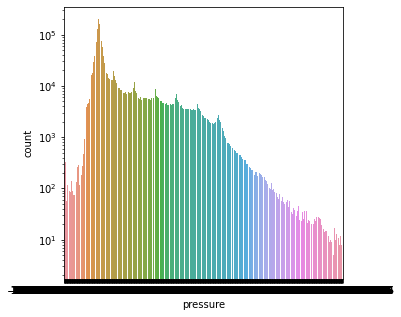

In [98]:
sns.countplot(df['pressure'])
rcParams['figure.figsize'] = 10,10
plt.yscale('log')

In [104]:
np.max(df.query('u_out==0'))#.count()

/Users/haritha_retnakaran/Documents/Neufische/CapStone/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


id           6.035950e+06
breath_id    1.257490e+05
R            5.000000e+01
C            5.000000e+01
time_step    9.997981e-01
u_in         1.000000e+02
u_out        0.000000e+00
pressure     6.482099e+01
dtype: float64

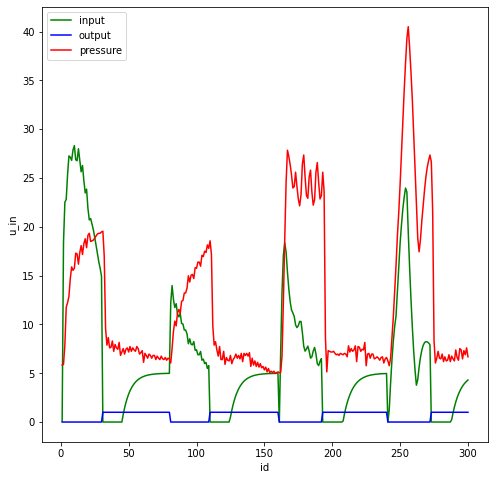

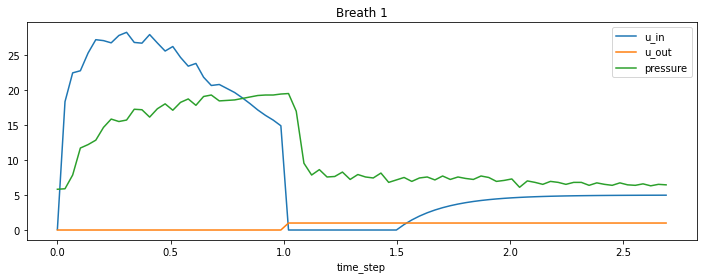

In [80]:
df1 = df.iloc[0:300,]
sns.lineplot(data=df1, x='id', y='u_in', color='green', label='input')
sns.lineplot(data=df1, x='id', y='u_out', color='blue', label='output')
sns.lineplot(data=df1, x='id', y='pressure', color='red', label='pressure')
plt.legend()
plt.show()

f, ax = plt.subplots(figsize=(12, 4))
df[df['breath_id'] == 1].set_index('time_step')[['u_in', 'u_out', 'pressure']].plot(ax=ax)
plt.title('Breath 1')
plt.show()

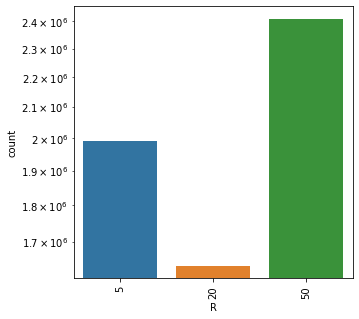

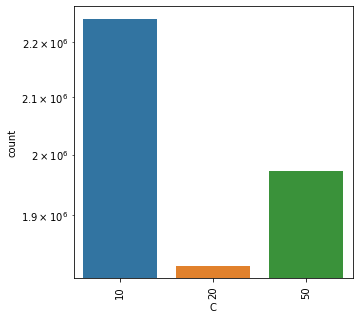

In [83]:
# bivartiate distrobution
for c in df[['R','C']].columns:
        plt.figure()
        #rcParams['figure.figsize'] = 5,5
        #g = sns.FacetGrid(data = data,  col = 'FraudResult')
        sns.countplot(x=c, data = df)
        #g.map(sns.countplot, x = c)
        plt.xticks(rotation=90)
        plt.yscale('log')

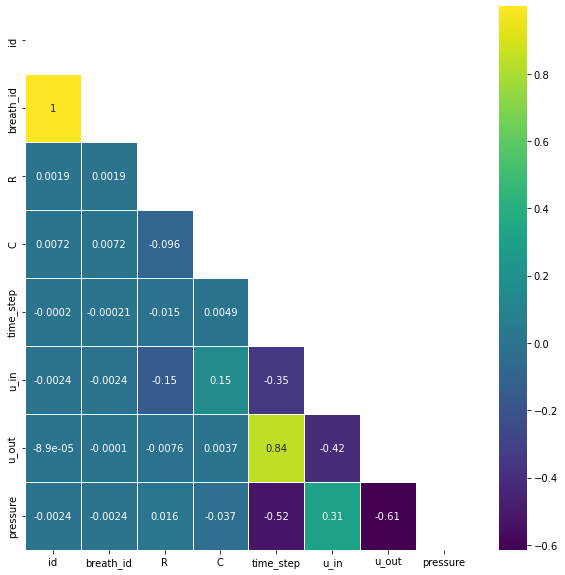

In [84]:
# plotting the correlation matrix on the given data to see how each column correlates to another
#stud_data = df#.drop(['sex', 'lang', 'country'], axis = 1)
plt.figure(figsize=(10, 10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

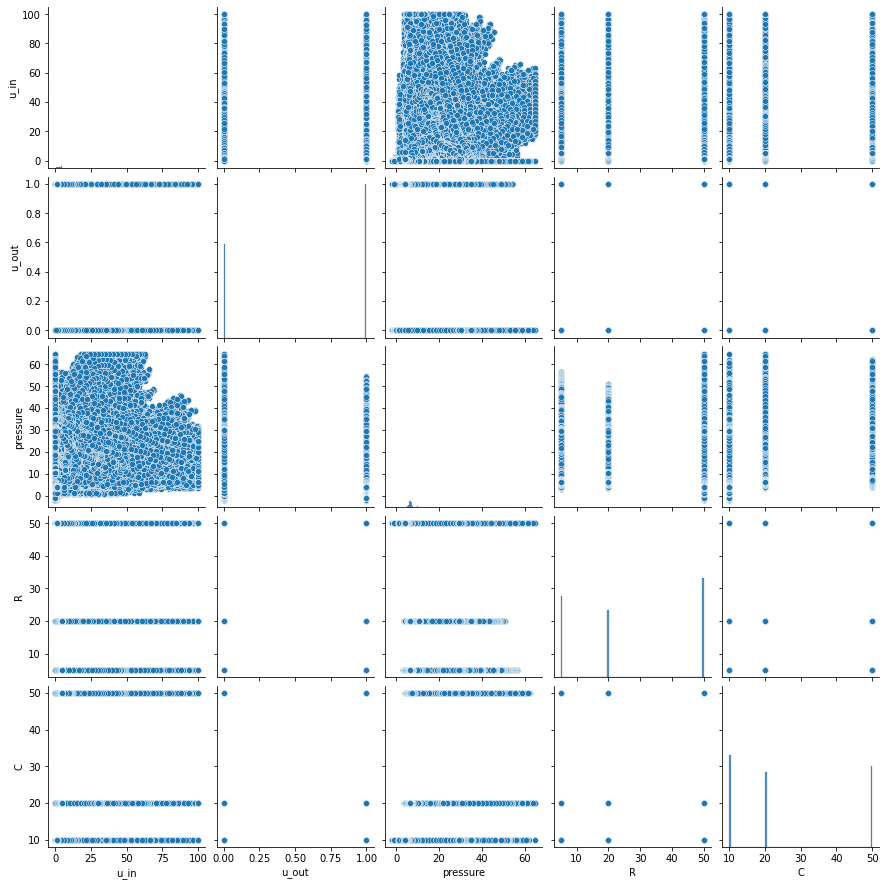

In [88]:
sns.pairplot(df[['u_in', 'u_out', 'pressure', 'R', 'C']])

In [82]:
# Convert time_step to datetime object
# Extract additional features from timestamp column
df1 = df.assign(
    timestamp = lambda x: pd.to_datetime(x['time_step']), 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)

df1.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,timestamp,date,year,month,day,dayofyear,hour
0,1,1,20,50,0.000000,0.083334,0,5.837492,1970-01-01,1970-01-01,1970,1,1,1,0
1,2,1,20,50,0.033652,18.383041,0,5.907794,1970-01-01,1970-01-01,1970,1,1,1,0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1970-01-01,1970-01-01,1970,1,1,1,0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1970-01-01,1970-01-01,1970,1,1,1,0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1970-01-01,1970-01-01,1970,1,1,1,0
